In [2]:
cd /home/soda/rcappuzz/work/benchmark-join-suggestions

/home/soda/rcappuzz/work/benchmark-join-suggestions


In [3]:
%load_ext autoreload

In [4]:
%autoreload 2
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.colors as mcolors
import src.utils.plotting as plotting
from src.utils.logging import read_logs
import tarfile

In [5]:
cfg = pl.Config()
cfg.set_fmt_str_lengths(150)

polars.config.Config

In [46]:
def pivot_based_on_value(melted_df, variable):
    pivoted = melted_df.filter(pl.col("variable") == variable).to_pandas().pivot_table(
        values="value",
        index=["base_table", "chosen_model"],
        columns=["estimator", "variable"],
        aggfunc="mean",
    )
    display(pivoted.style.background_gradient(axis=1, cmap="RdYlGn").format(precision=3))

In [56]:
def melt_table(df):
    melted = df.melt(
        id_vars=["base_table", "estimator", "aggregation", "chosen_model"],
        value_vars=["r2score", "n_cols", "time_fit", "time_predict", "time_run"],
    )
    return melted

# Depleted table

Run: `0170-fjxndnzl`

In [8]:
run_name = "0170-fjxndnzl"
df_raw = read_logs(run_name)

In [9]:
df_ = df_raw.select(
    pl.col(
        [
            "scenario_id",
            "base_table",
            "estimator",
            "aggregation",
            "r2score",
            "n_cols",
            "time_fit",
            "time_predict",
            "time_run",
        ]
    )
)

In [10]:
melted = melt_table(df_)

In [11]:
pivot_based_on_value(melted, "r2score")

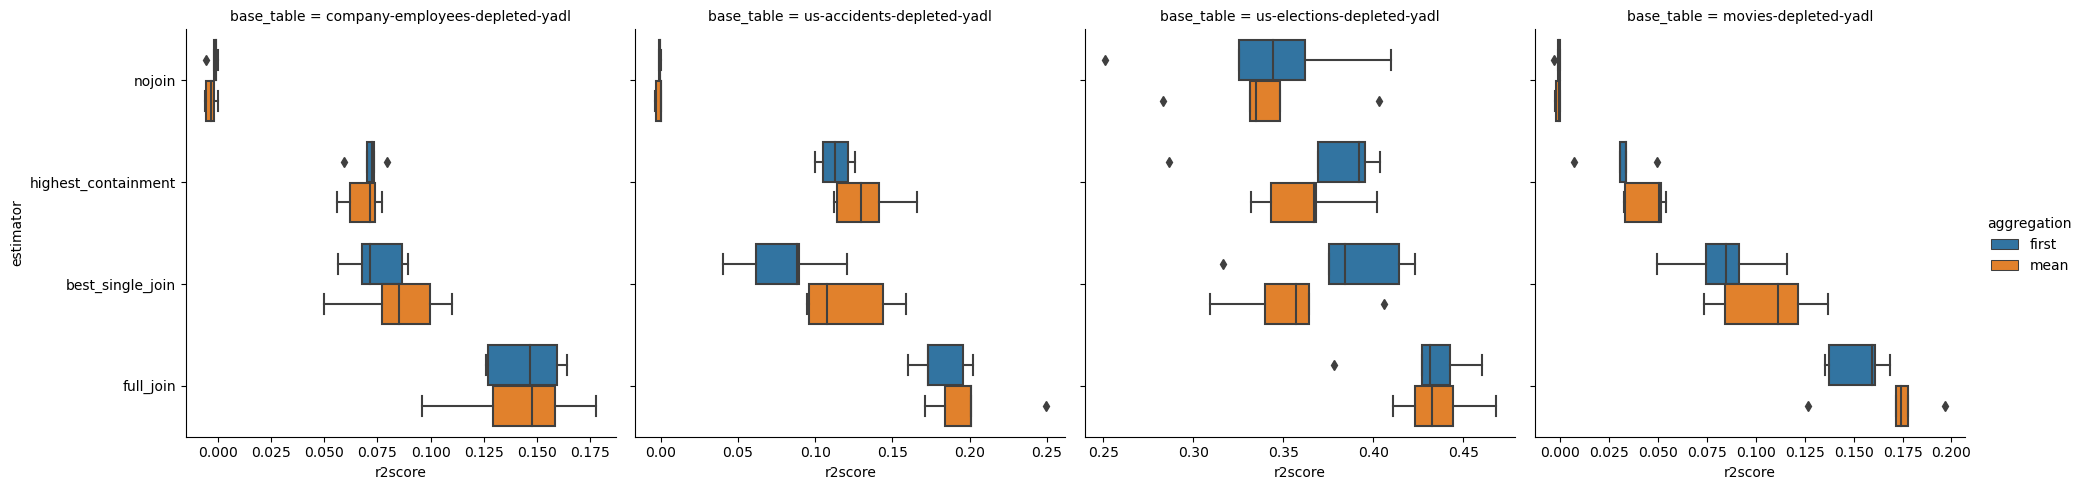

In [12]:
sns.catplot(data=df_raw.to_pandas(), x="r2score", y="estimator", hue="aggregation", kind="box", col="base_table", sharex=False)

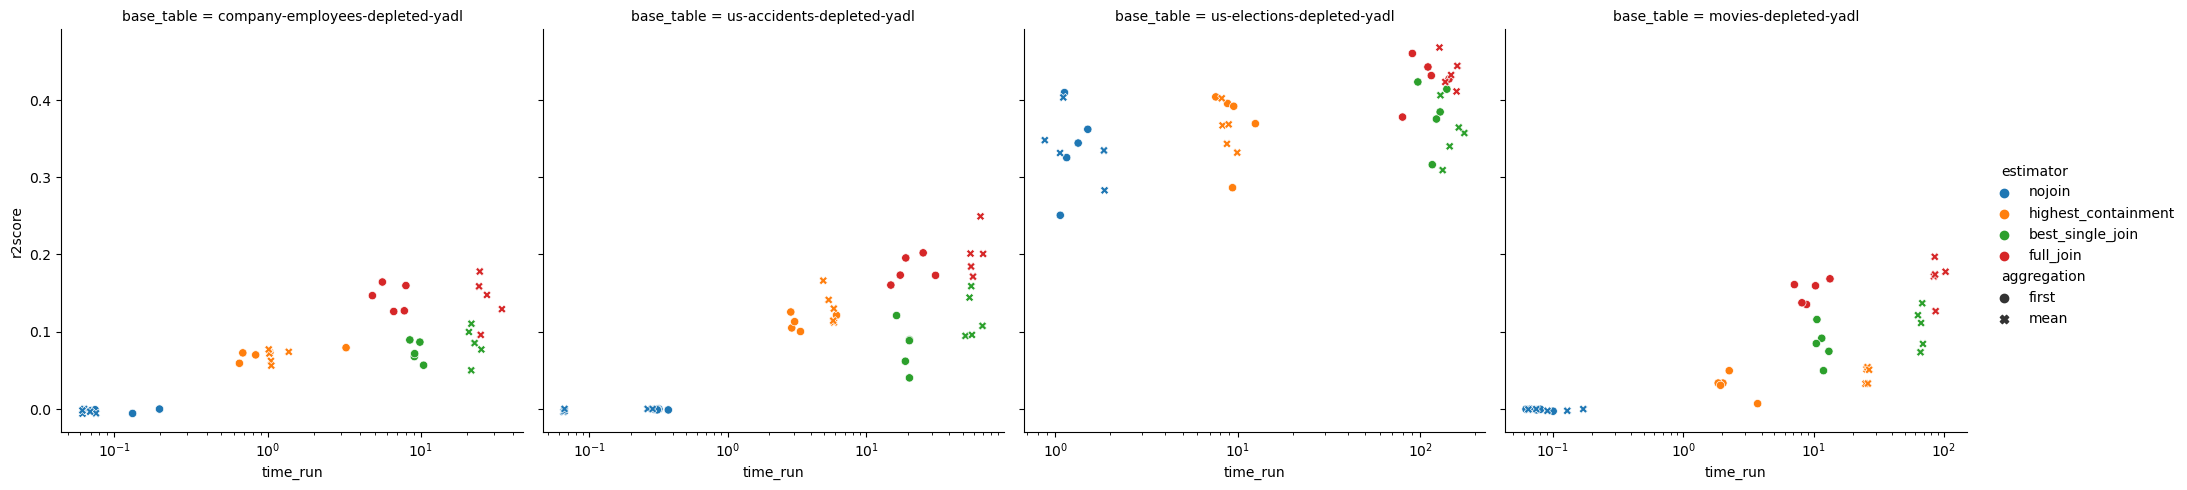

In [13]:
sns.relplot(data=df_raw.to_pandas(), x="time_run", y="r2score", style="aggregation", col="base_table", hue="estimator", kind="scatter", facet_kws={"sharex":False, "subplot_kws":{"xscale":"log"}}, )

# Full table

In [14]:
run_name = "0172-kwhnazxb"
df_raw = read_logs(run_name)

In [15]:
df_ = df_raw.select(
    pl.col(
        [
            "scenario_id",
            "base_table",
            "estimator",
            "aggregation",
            "r2score",
            "n_cols",
            "time_fit",
            "time_predict",
            "time_run",
        ]
    )
)

In [16]:
melted = melt_table(df_)

In [17]:
pivot_based_on_value(melted, "r2score")

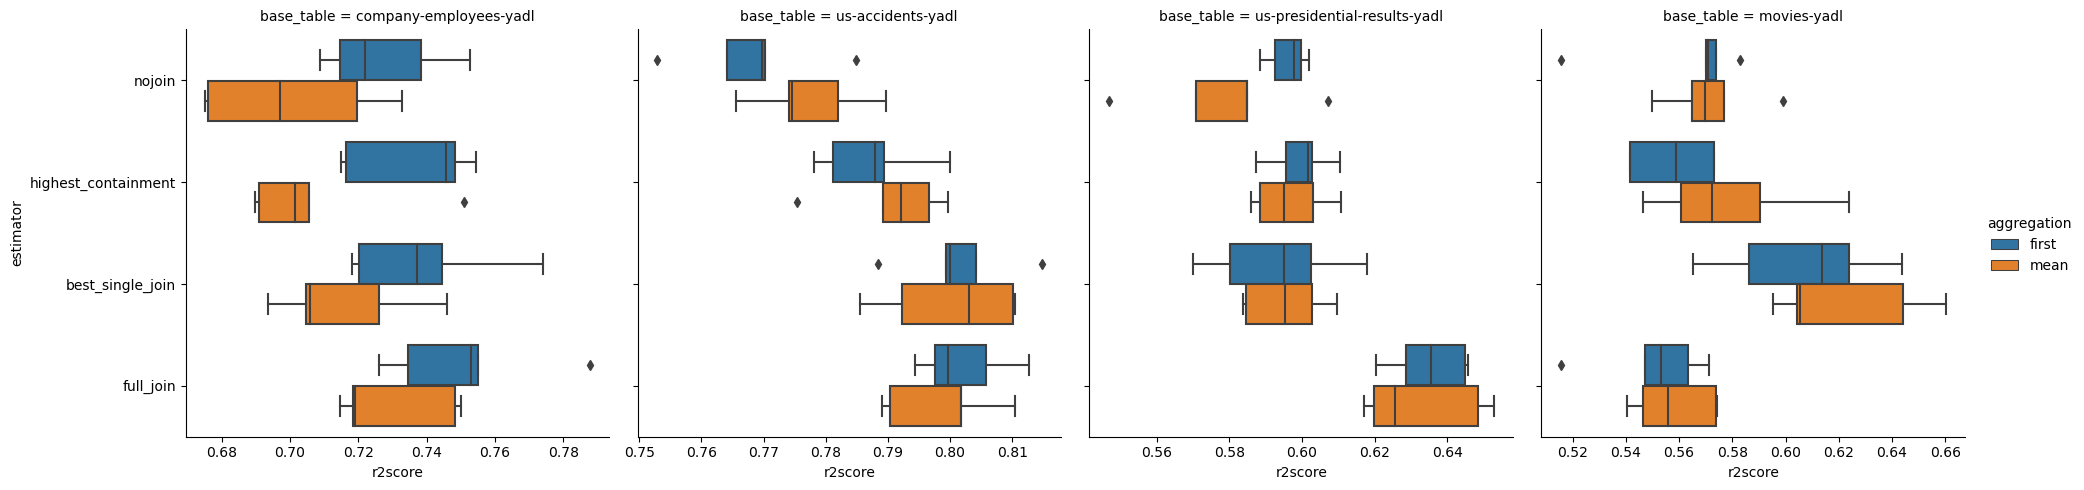

In [18]:
sns.catplot(data=df_raw.to_pandas(), x="r2score", y="estimator", hue="aggregation", kind="box", col="base_table", sharex=False)

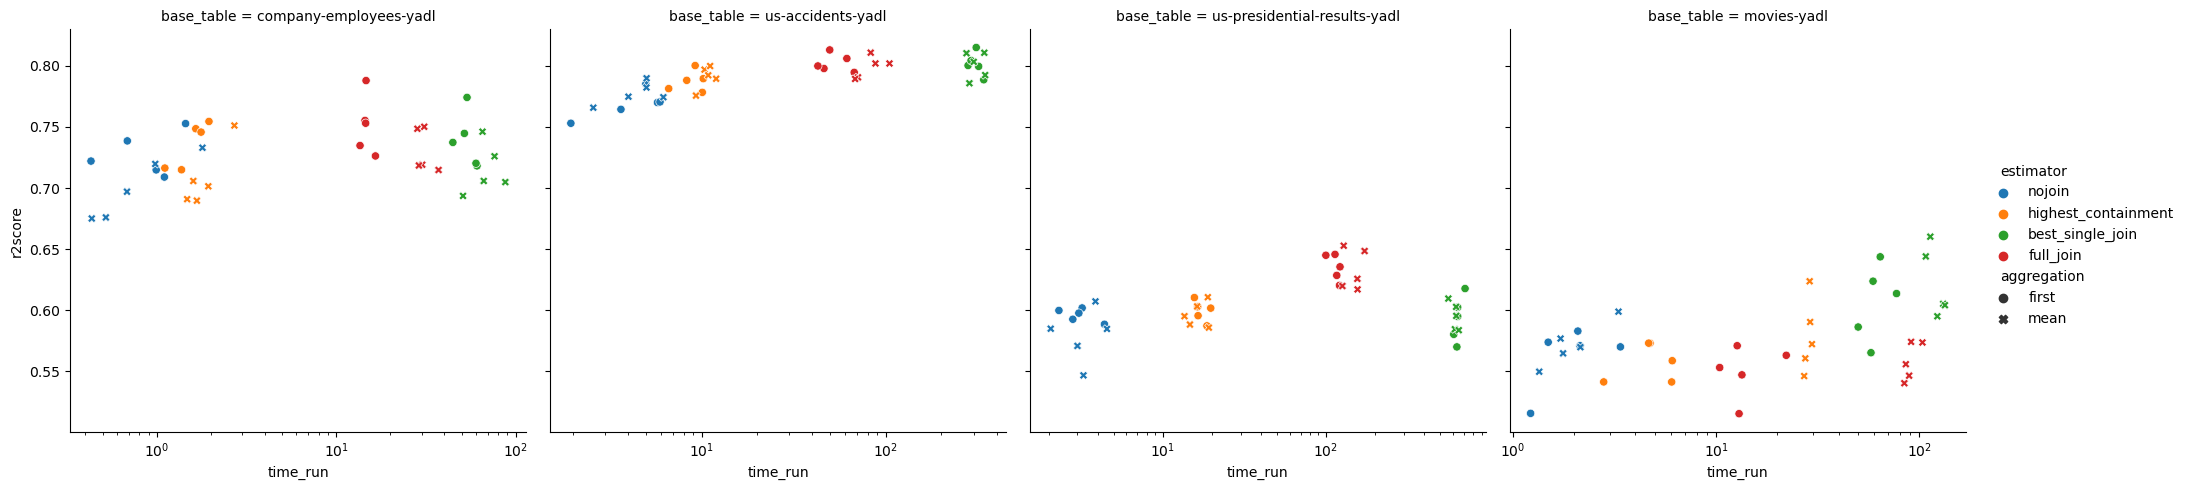

In [19]:
sns.relplot(data=df_raw.to_pandas(), x="time_run", y="r2score", style="aggregation", col="base_table", hue="estimator", kind="scatter", facet_kws={"sharex":False, "subplot_kws":{"xscale":"log"}}, )

# Preliminary Linear VS Catboost 

In [20]:
run_name = "0179-grd9pb9g"


In [21]:
df_raw = read_logs(run_name)
df_ = df_raw.with_columns(
    pl.when(pl.col("scenario_id") <4).then("linear").otherwise("catboost").alias("chosen_model")
)

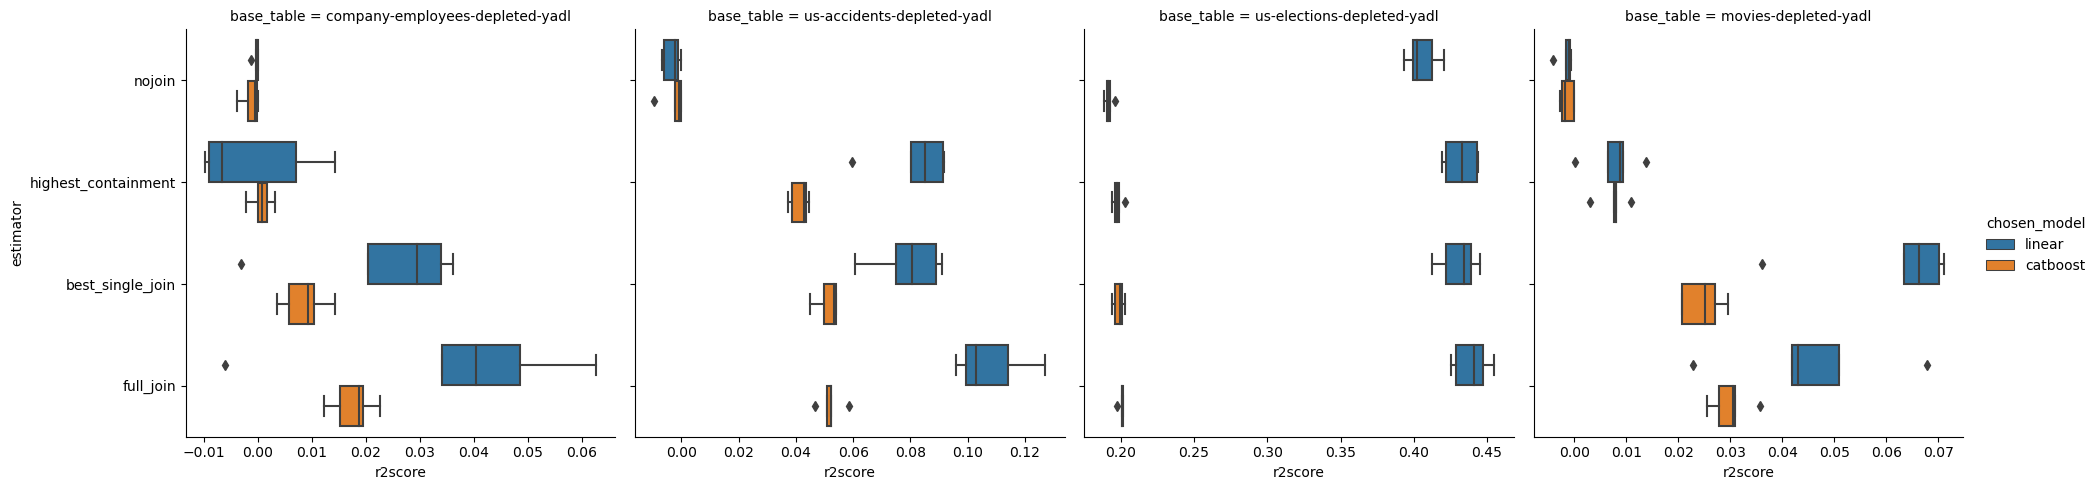

In [22]:
sns.catplot(data=df_.to_pandas(), x="r2score", y="estimator", hue="chosen_model", kind="box", col="base_table",sharex=False )

### Combining runs

In [23]:
other_run = "0170-fjxndnzl"
df_other = read_logs(other_run)
df_other = df_other.filter(pl.col("aggregation") == "first")
df_other = df_other.with_columns( pl.lit("catboost").alias("chosen_model"), pl.lit(other_run).alias("run_name"),)

In [24]:
df_this = df_.with_columns(pl.lit(run_name).alias("run_name")).filter(pl.col("aggregation") == "first")

In [25]:
df_this = df_this.filter(pl.col("chosen_model") == "linear")

In [26]:
df_concat = pl.concat([df_this, df_other])

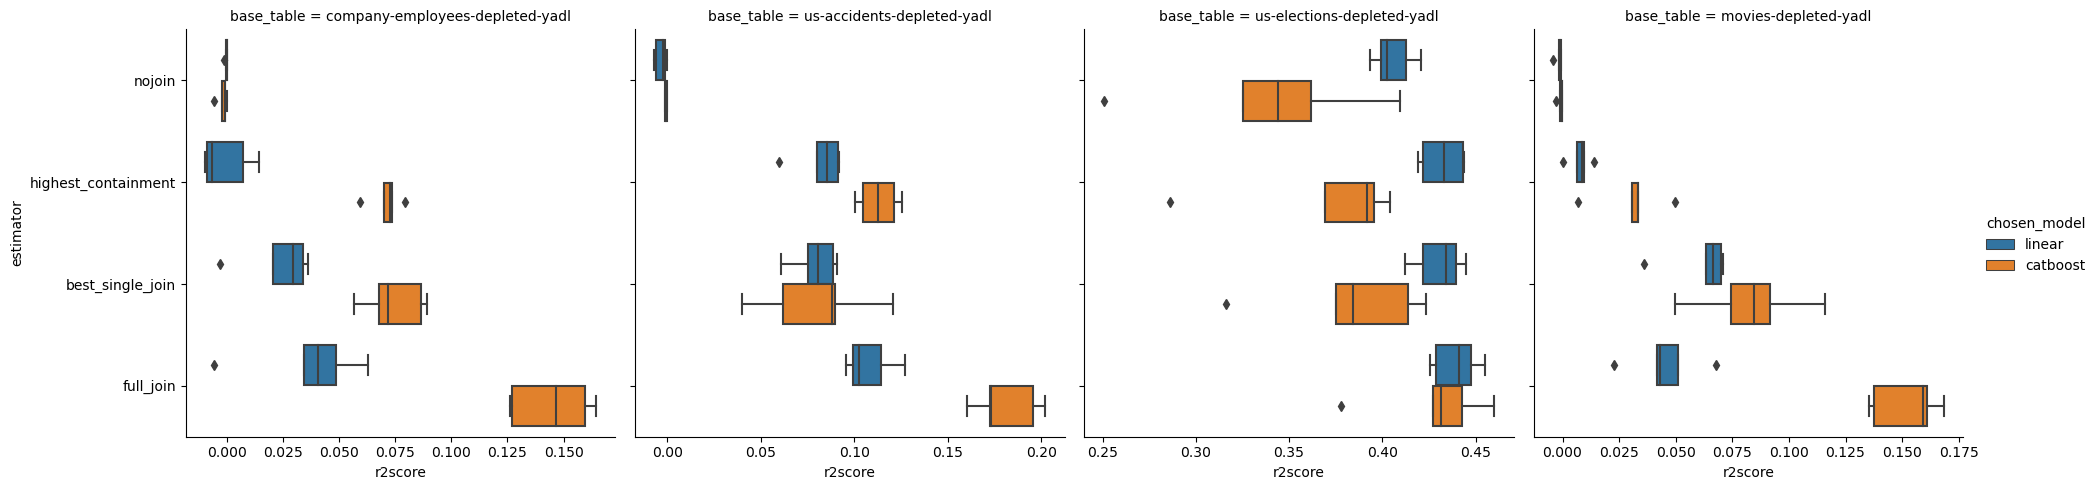

In [27]:
sns.catplot(data=df_concat.to_pandas(), x="r2score", y="estimator", hue="chosen_model", kind="box", col="base_table",sharex=False )

# Focus on US Elections

In [28]:
run_name = "0184-a7bevdnt"

In [29]:
df_raw = read_logs(run_name)


In [30]:
run_name = "0172-kwhnazxb"
df_raw = read_logs(run_name)

In [31]:
# sns.catplot(data=df_raw.to_pandas(), x="r2score", y="estimator", hue="chosen_model", kind="box", col="base_table",sharex=False )

ValueError: Could not interpret input 'chosen_model'

# All datasets same run

In [32]:
run_name = "0185-zlt20ltk"

In [51]:
df_raw = read_logs(run_name)


In [52]:
df_ = df_raw.select(
    pl.col(
        [
            "scenario_id",
            "base_table",
            "estimator",
            "chosen_model",
            "aggregation",
            "r2score",
            "n_cols",
            "time_fit",
            "time_predict",
            "time_run",
        ]
    )
)

In [57]:
melted = melt_table(df_)

In [59]:
pivot_based_on_value(melted, "r2score")

In [65]:
col_order=df_raw.select(pl.col("base_table").unique()).sort("base_table").to_series().to_list()

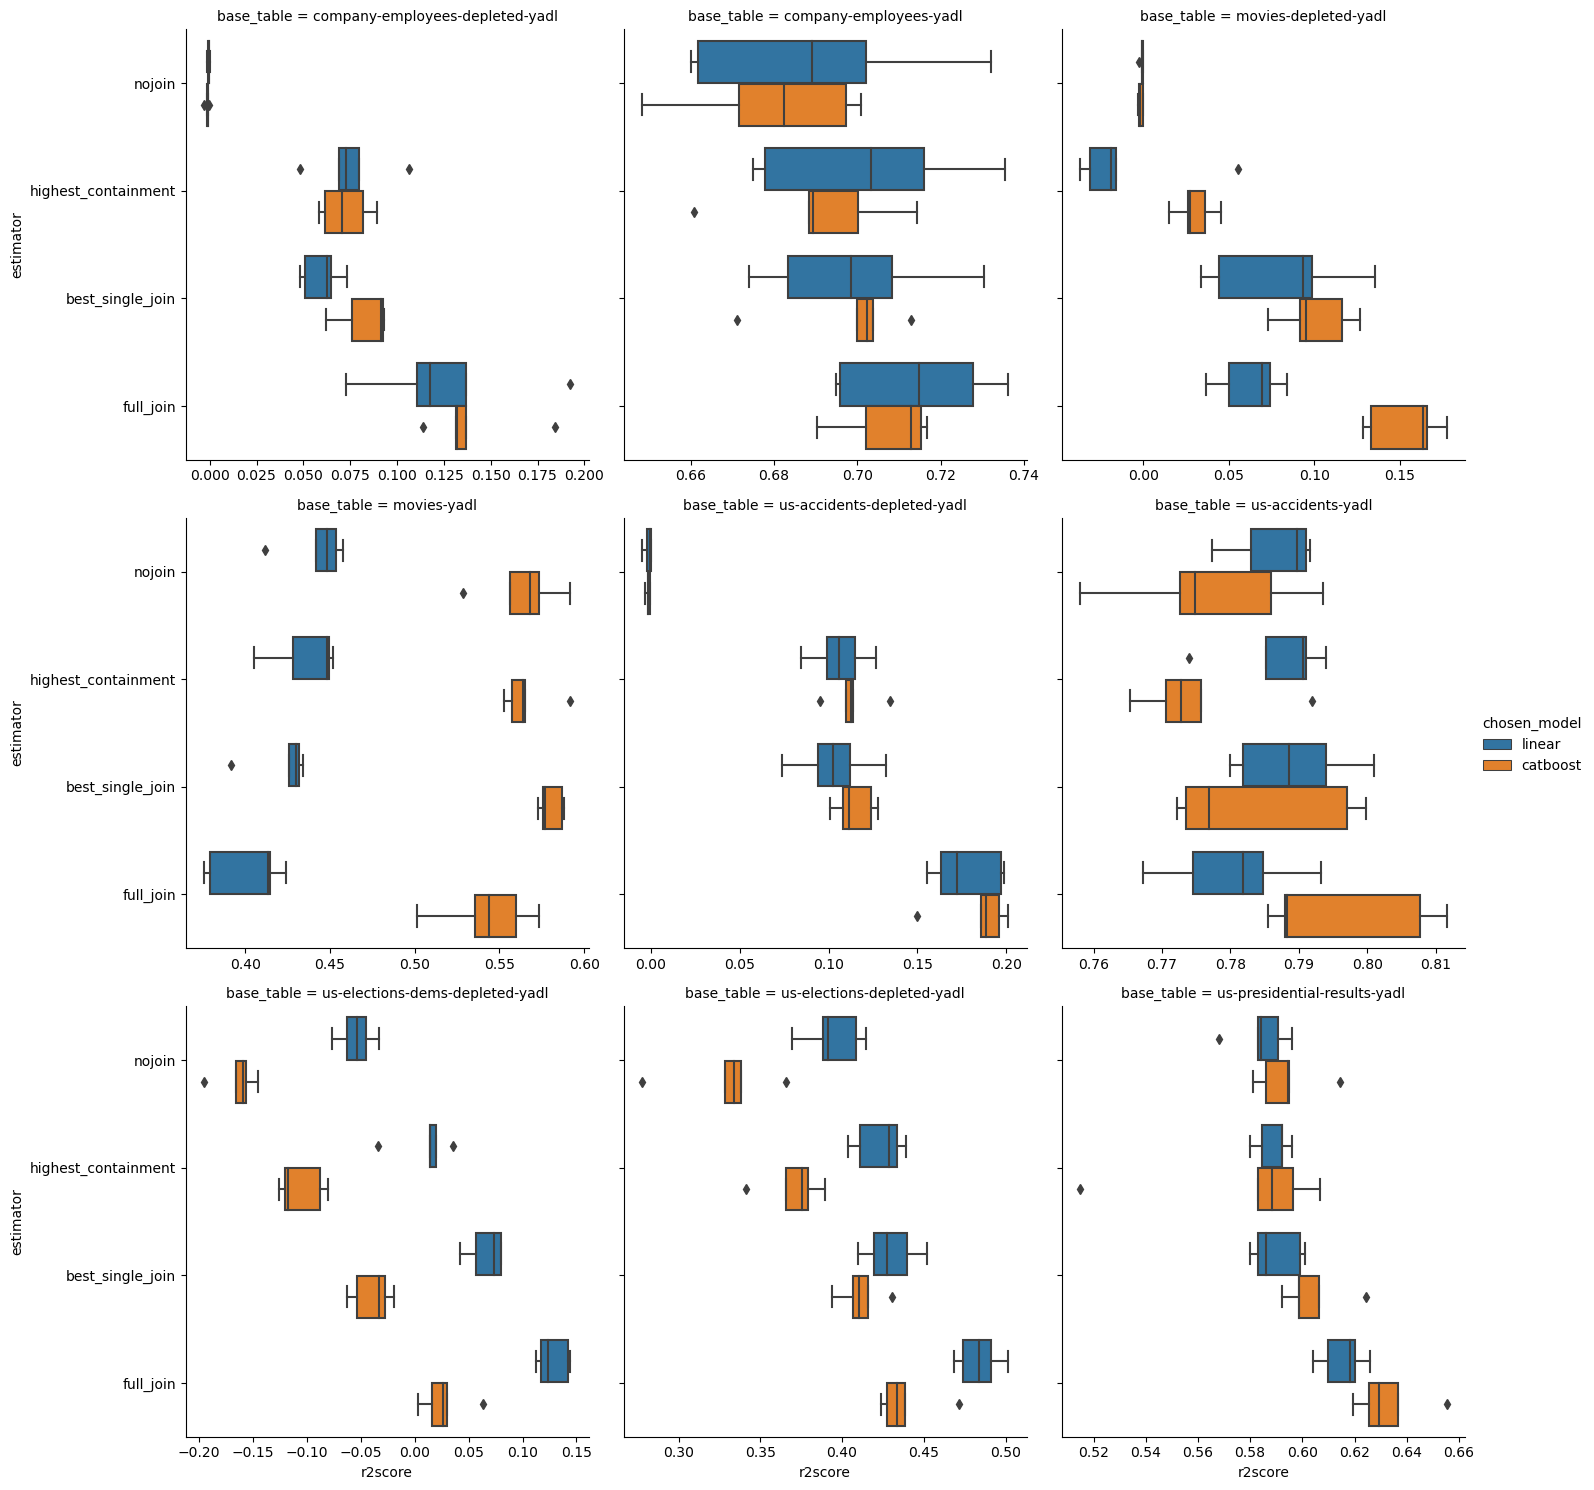

In [66]:
sns.catplot(data=df_raw.to_pandas(), x="r2score", y="estimator", hue="chosen_model", kind="box", col="base_table", sharex=False, col_wrap=3, col_order=col_order)

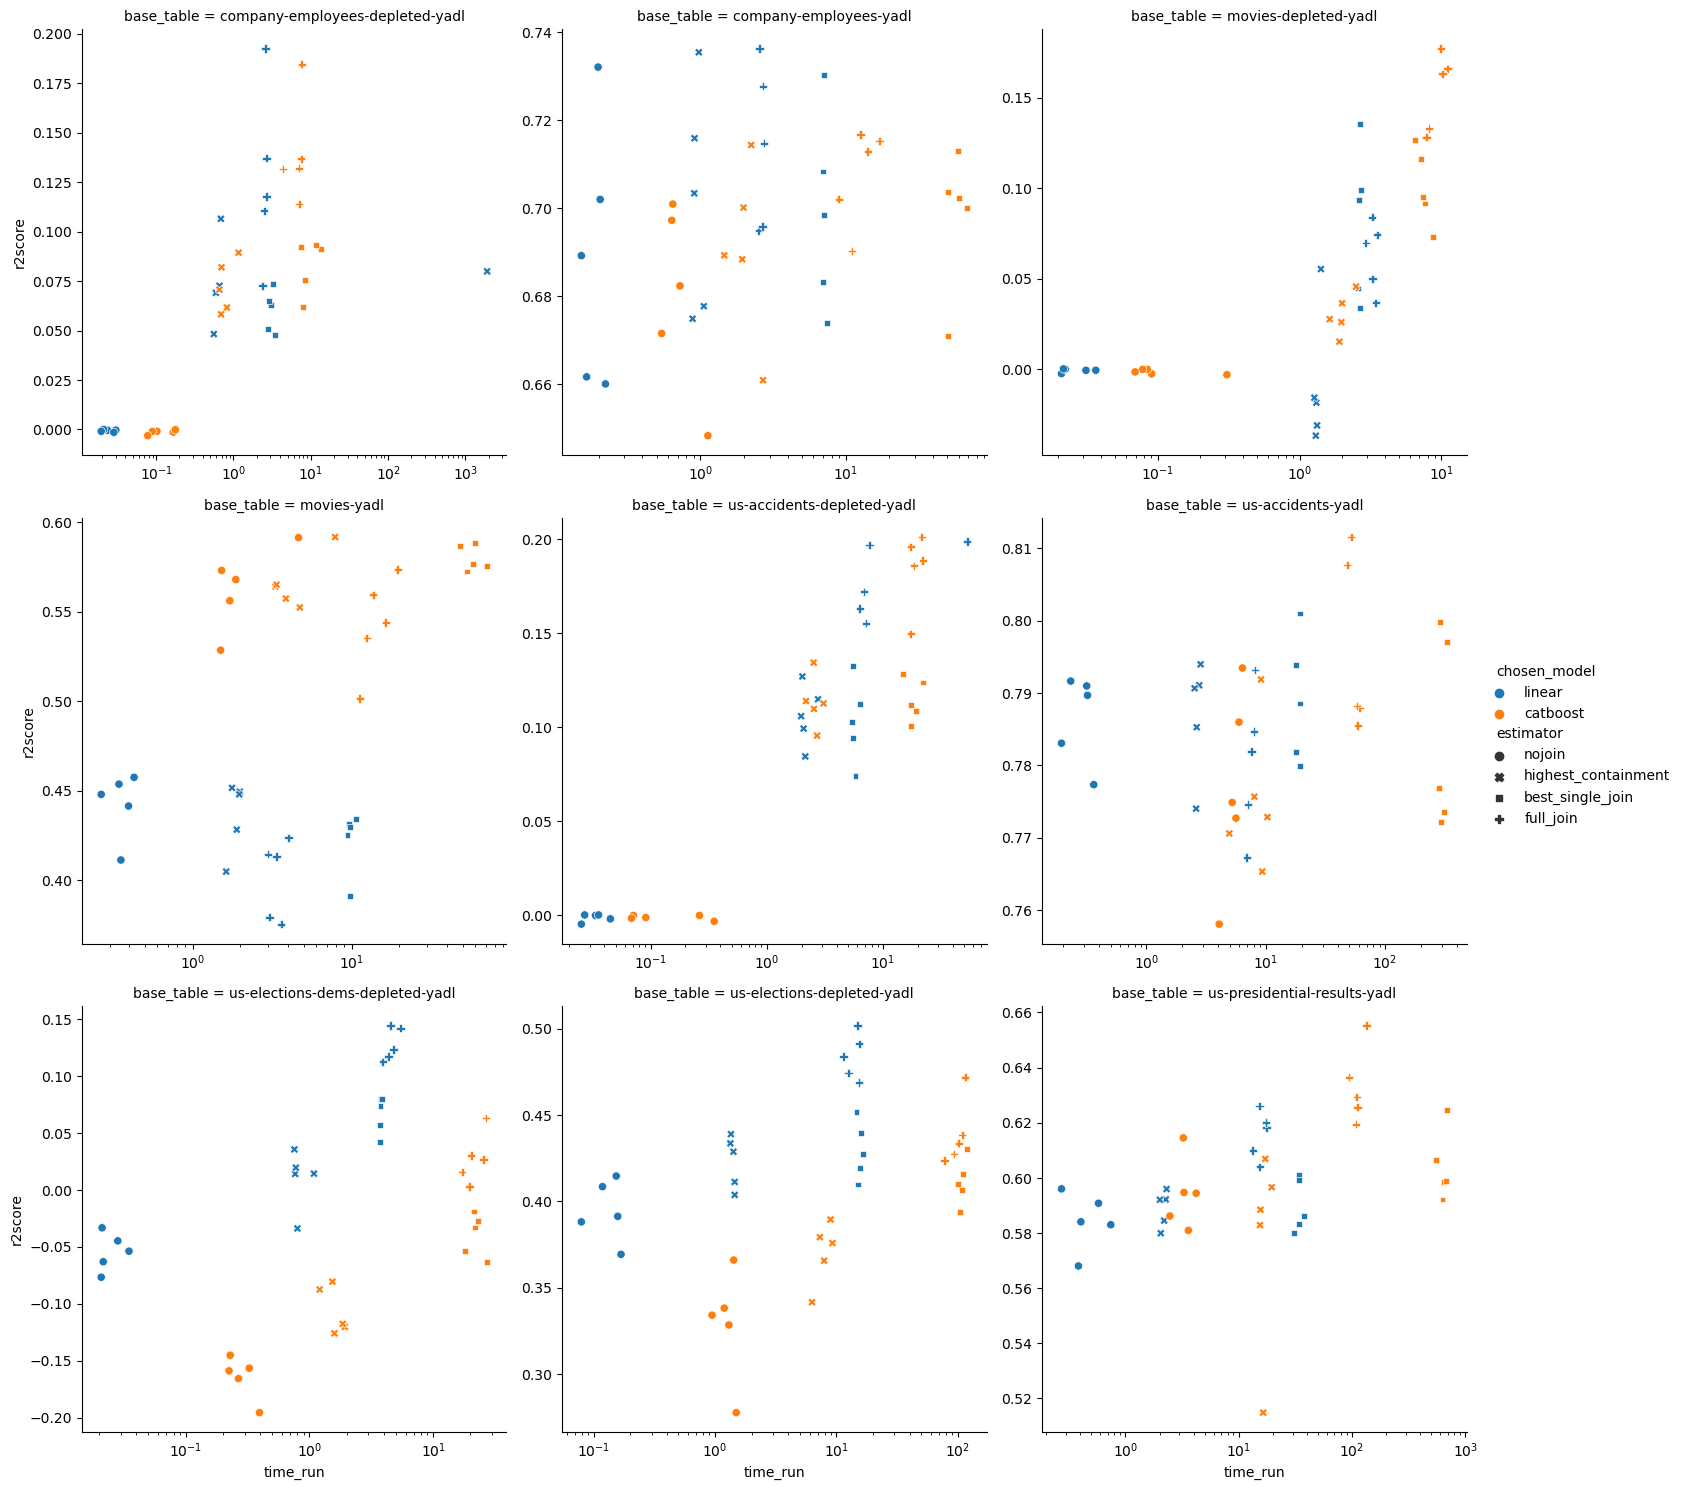

In [67]:
sns.relplot(data=df_raw.to_pandas(), x="time_run", y="r2score", hue="chosen_model", col="base_table", style="estimator", kind="scatter", facet_kws={"sharex":False, "sharey":False, "subplot_kws":{"xscale":"log"}}, col_wrap=3, col_order=col_order)

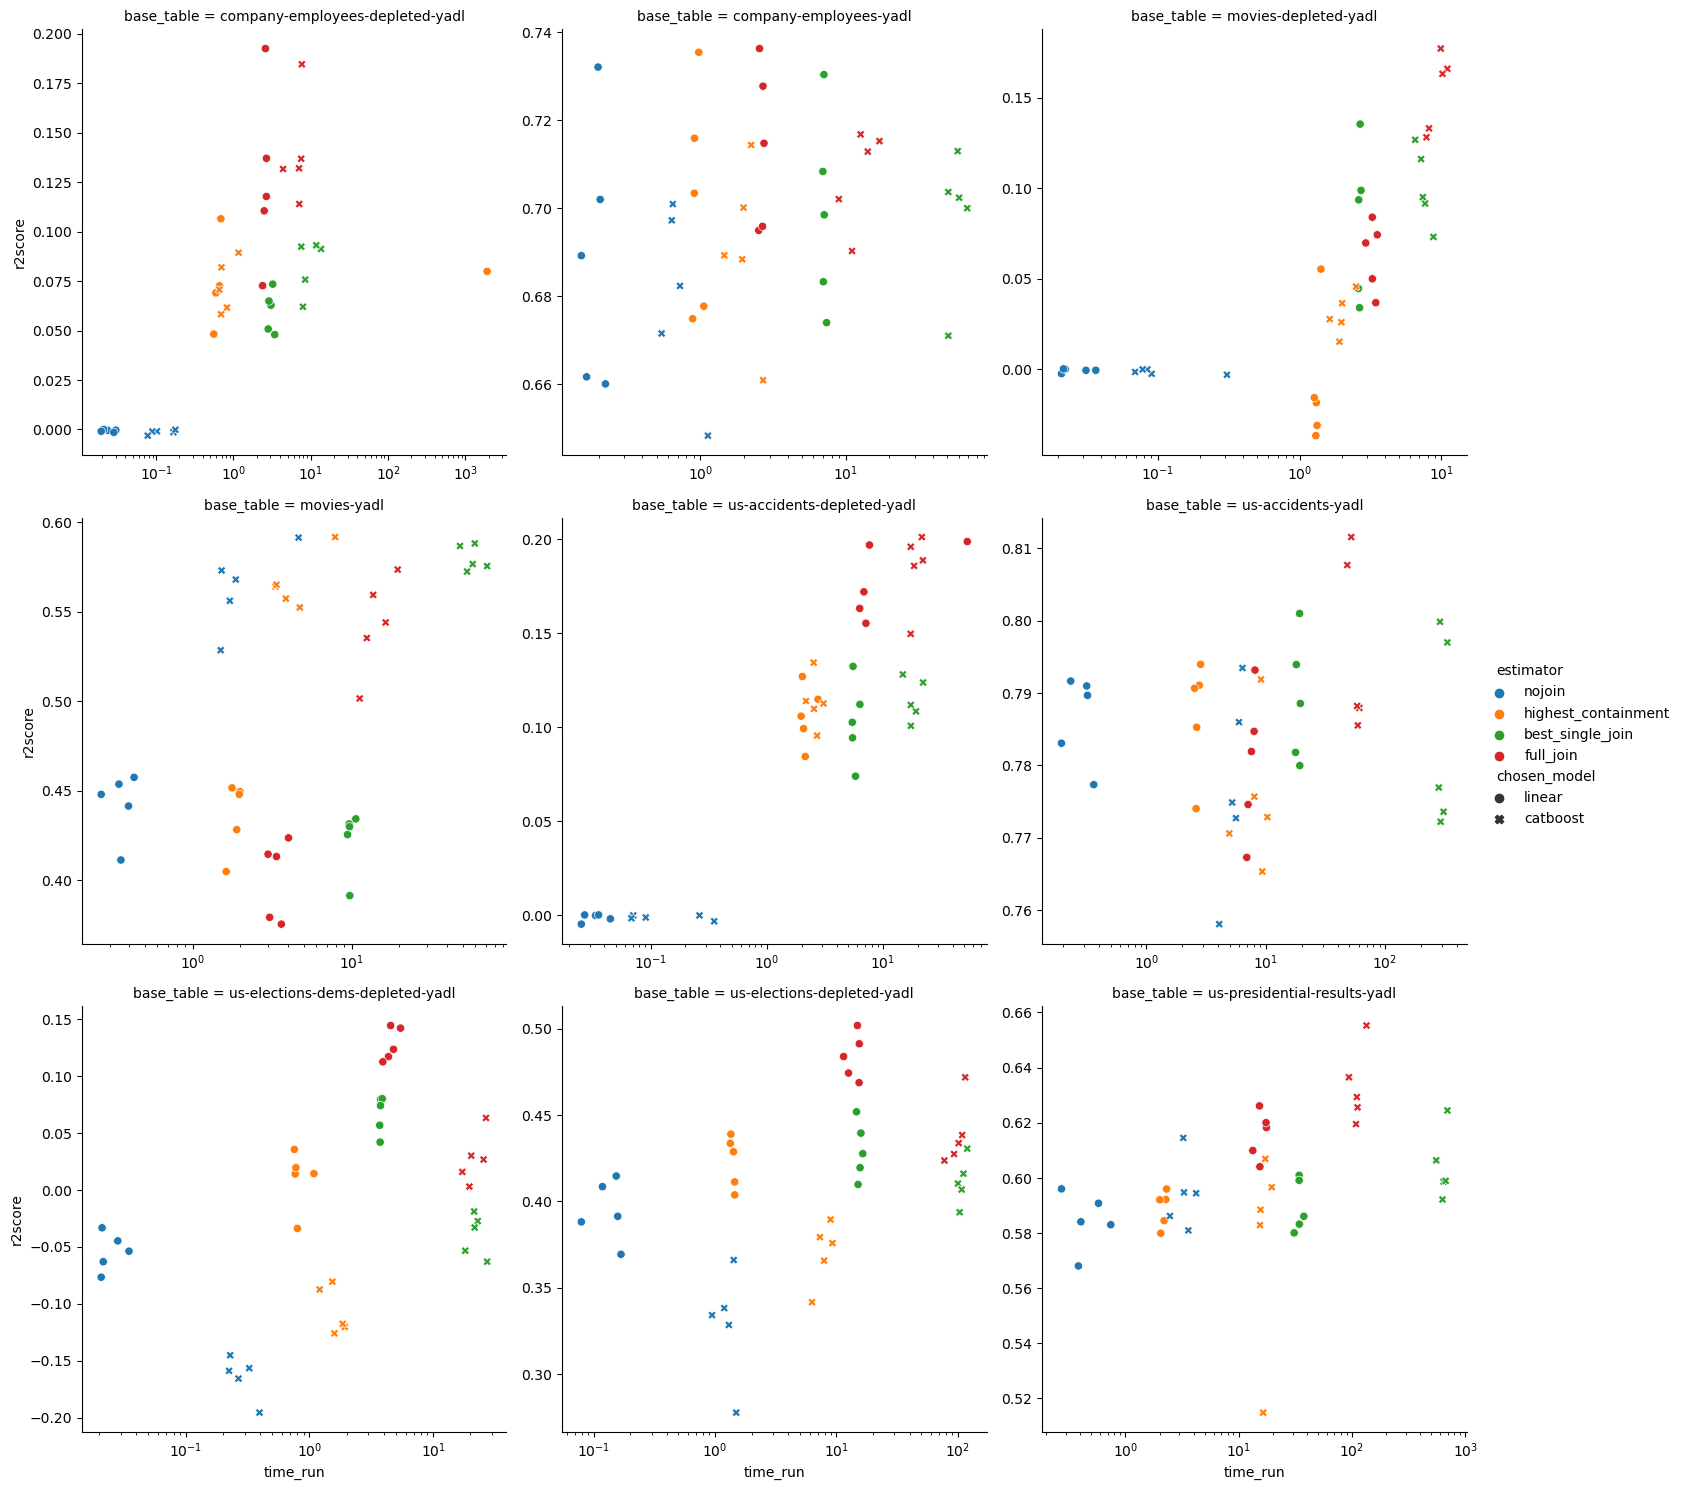

In [68]:
sns.relplot(data=df_raw.to_pandas(), x="time_run", y="r2score", style="chosen_model", col="base_table", hue="estimator", kind="scatter", facet_kws={"sharex":False, "sharey":False, "subplot_kws":{"xscale":"log"}}, col_wrap=3, col_order=col_order)

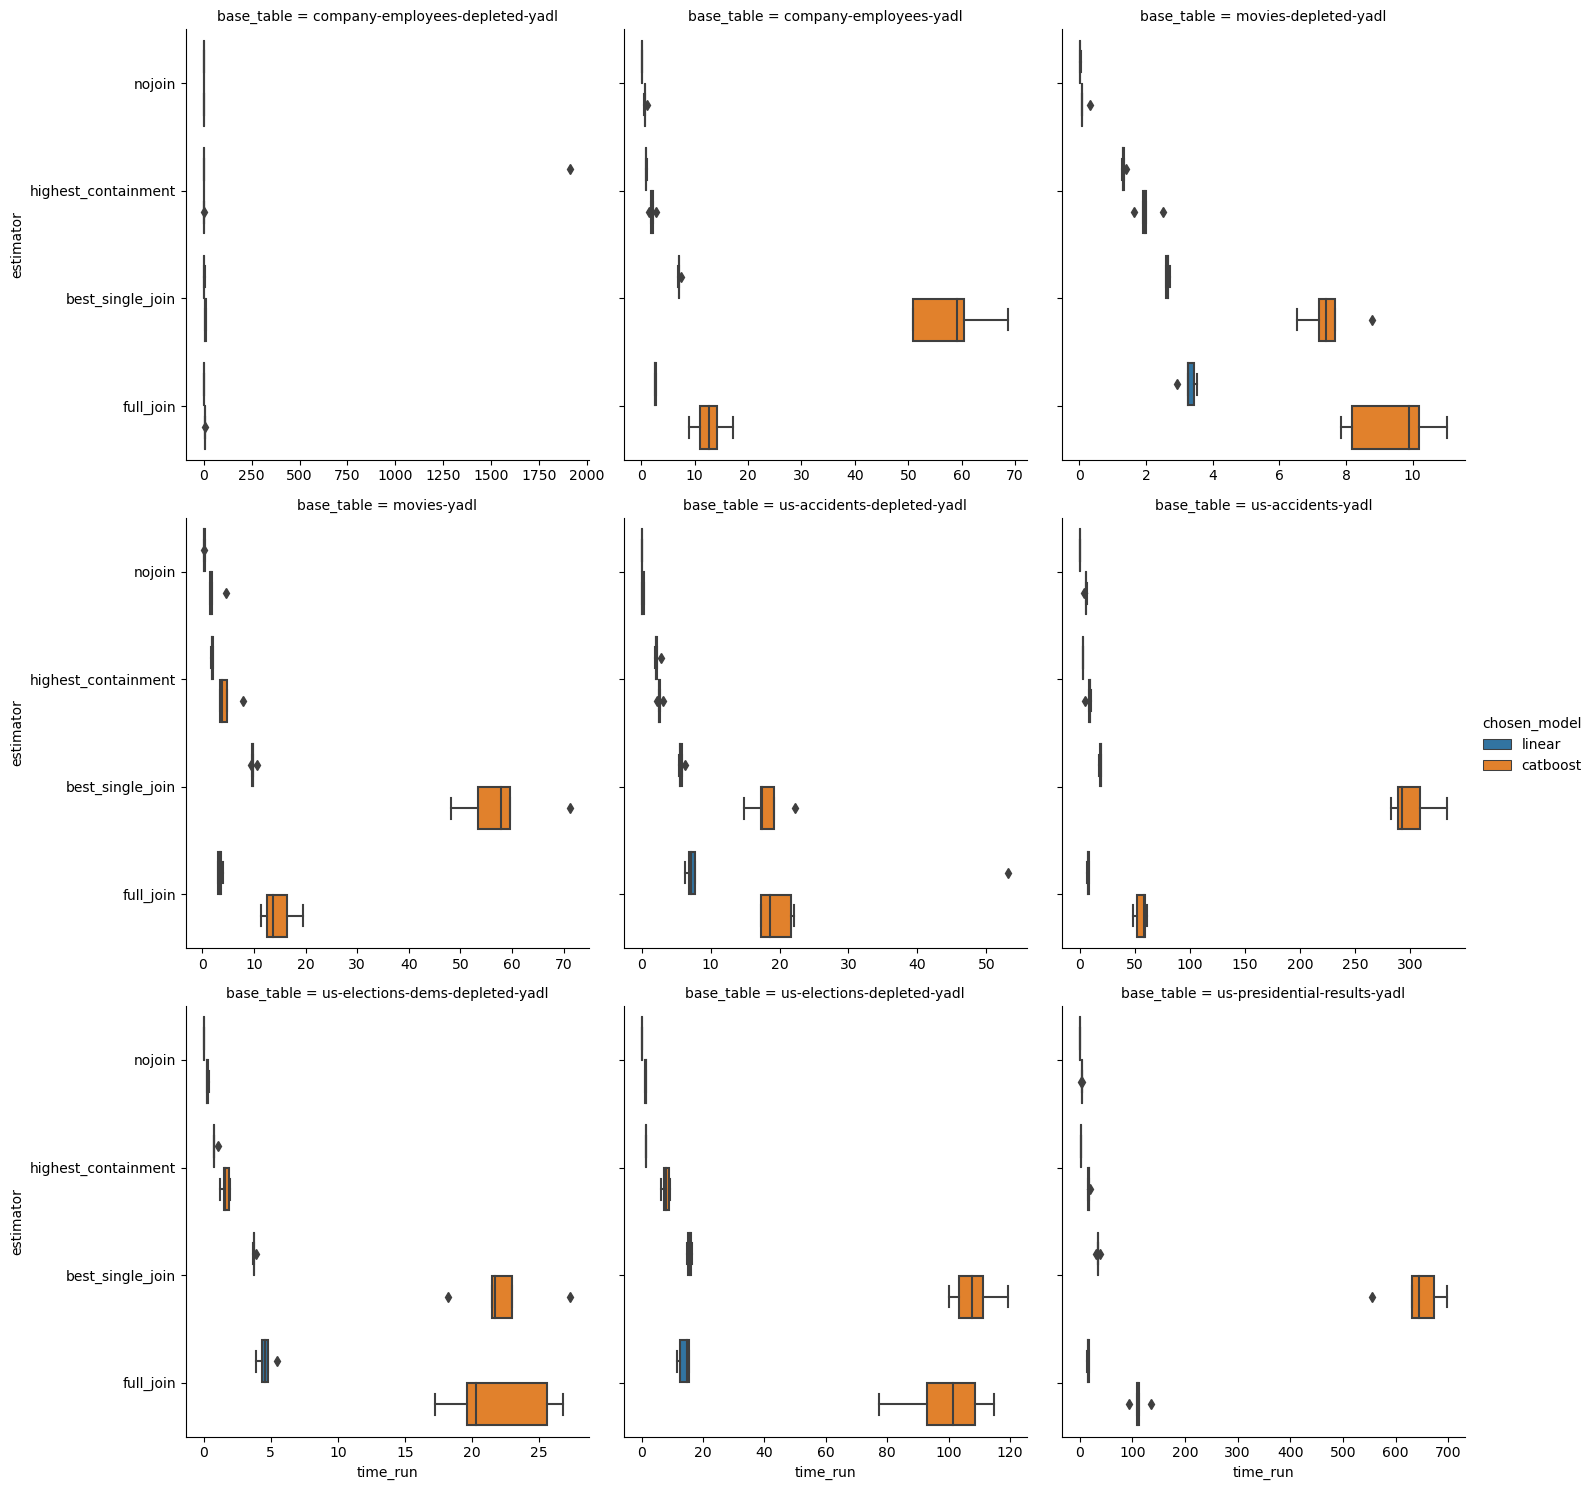

In [69]:
sns.catplot(data=df_raw.to_pandas(), x="time_run", y="estimator", hue="chosen_model", kind="box", col="base_table", sharex=False, col_wrap=3, col_order=col_order)